In [1]:
!pip install matplotlib
!pip install tensorflow

In [5]:
import tensorflow as tf
import logging
import os
import matplotlib.pyplot as plt
import numpy as np

# Display Loss Chart

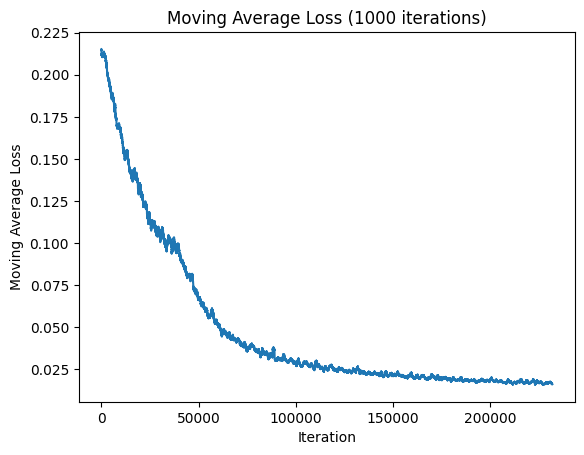

In [12]:
baseline_dir = '/data/lsd_nm_experiments/02_train/3M-APP-SCN/baseline/'
log_dir = os.path.join(baseline_dir, 'log')

# Get a list of log files in the directory
log_files = [file for file in os.listdir(log_dir) if file.startswith('events.out.tfevents')]

step_losses = []  # List to store the step-loss pairs

# Iterate over the log files and extract the losses
for log_file in log_files:
    file_path = os.path.join(log_dir, log_file)
    for event in tf.compat.v1.train.summary_iterator(file_path):
        for value in event.summary.value:
            if value.tag == 'setup01/setup01_eucl_loss':  # Adjust the tag based on your specific logging format
                step = event.step
                loss = value.simple_value
                step_losses.append((step, loss))

# Sort the step-loss pairs based on the step number
step_losses.sort(key=lambda x: x[0])

# Extract the sorted steps and losses
steps = [pair[0] for pair in step_losses]
losses = [pair[1] for pair in step_losses]

# Calculate the moving average
window_size = 1000  # Adjust the window size as needed
moving_avg = np.convolve(losses, np.ones(window_size)/window_size, mode='valid')


# Create a plot of the moving average
plt.plot(moving_avg)
plt.xlabel('Iteration')
plt.ylabel('Moving Average Loss')
plt.title(f'Moving Average Loss ({window_size} iterations)')
plt.show()